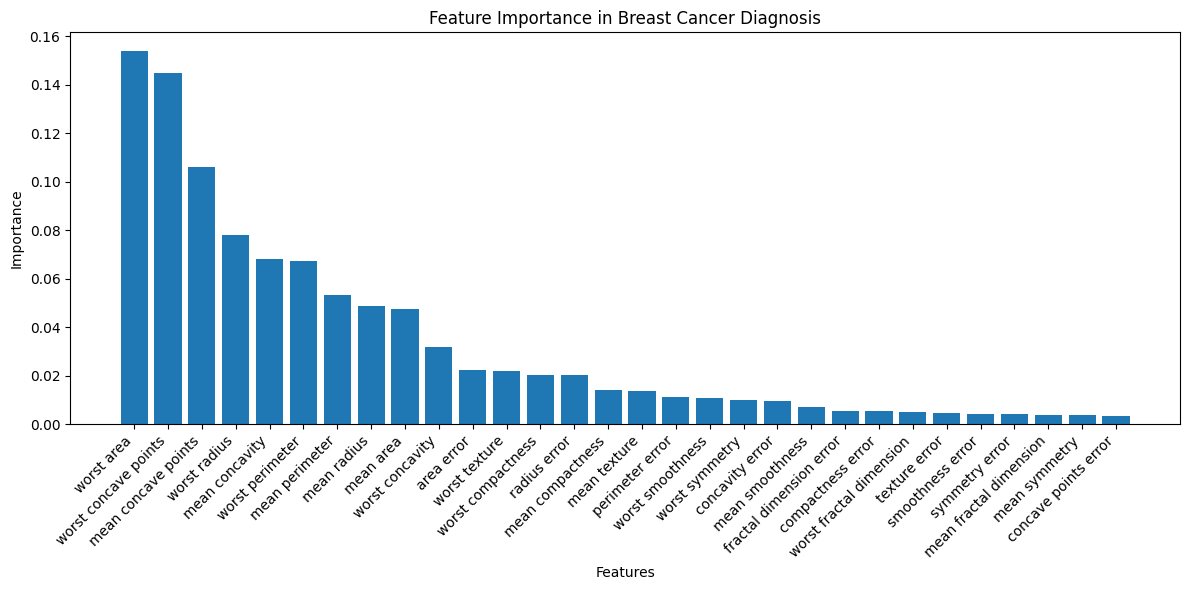


Top 10 Most Important Features:
                 feature  importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001
22       worst perimeter    0.067115
2         mean perimeter    0.053270
0            mean radius    0.048703
3              mean area    0.047555
26       worst concavity    0.031802


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 1. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': data.feature_names,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance['importance'])
plt.xticks(range(len(feature_importance)), feature_importance['feature'], rotation=45, ha='right')
plt.title('Feature Importance in Breast Cancer Diagnosis')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

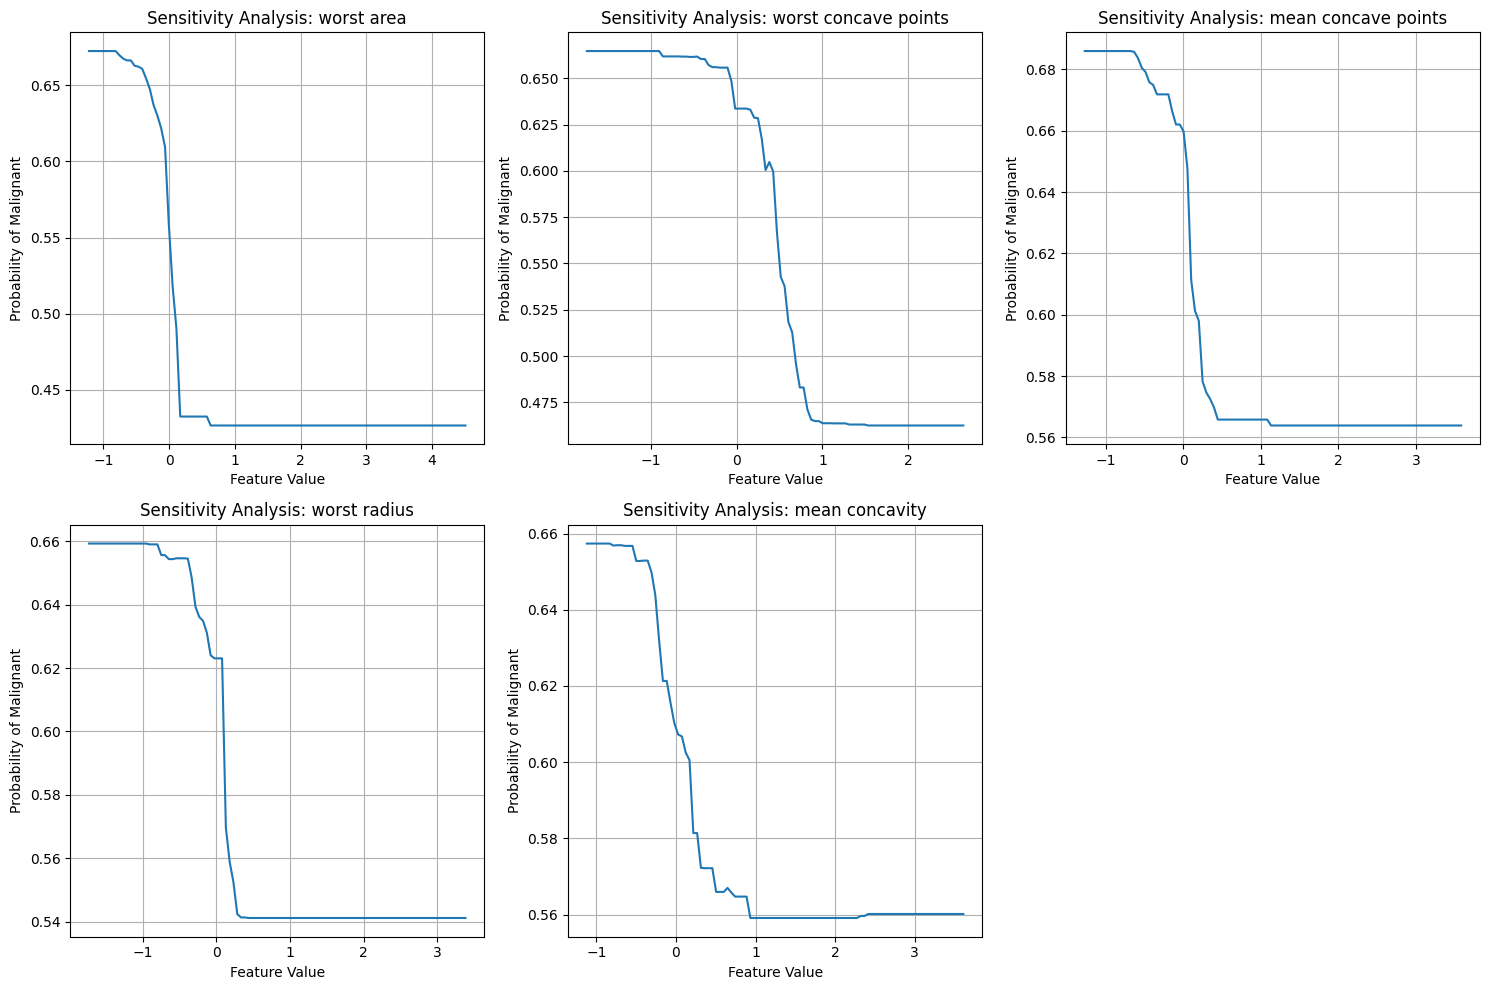


Sensitivity Analysis Summary:
For each of the top 5 features, we analyzed how changes in the feature value affect the probability of malignant diagnosis.
The plots show the relationship between feature values and the predicted probability of malignancy.

Top 5 Features Analyzed:
- worst area: Importance = 0.1539
- worst concave points: Importance = 0.1447
- mean concave points: Importance = 0.1062
- worst radius: Importance = 0.0780
- mean concavity: Importance = 0.0680


In [2]:
# 2. Sensitivity Analysis
def sensitivity_analysis(model, X, feature_names, feature_idx, n_points=100):
    # Create a range of values for the selected feature
    feature_values = np.linspace(X[:, feature_idx].min(), X[:, feature_idx].max(), n_points)
    predictions = []

    # For each value, predict while keeping other features constant
    for value in feature_values:
        X_modified = X.copy()
        X_modified[:, feature_idx] = value
        pred = model.predict_proba(X_modified)[:, 1]
        predictions.append(pred.mean())

    return feature_values, predictions

# Perform sensitivity analysis on top 5 features
top_features = feature_importance.head(5)
plt.figure(figsize=(15, 10))

for idx, (_, row) in enumerate(top_features.iterrows(), 1):
    feature_idx = list(data.feature_names).index(row['feature'])
    feature_values, predictions = sensitivity_analysis(rf, X_test_scaled, data.feature_names, feature_idx)

    plt.subplot(2, 3, idx)
    plt.plot(feature_values, predictions)
    plt.title(f'Sensitivity Analysis: {row["feature"]}')
    plt.xlabel('Feature Value')
    plt.ylabel('Probability of Malignant')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print sensitivity analysis summary
print("\nSensitivity Analysis Summary:")
print("For each of the top 5 features, we analyzed how changes in the feature value affect the probability of malignant diagnosis.")
print("The plots show the relationship between feature values and the predicted probability of malignancy.")
print("\nTop 5 Features Analyzed:")
for _, row in top_features.iterrows():
    print(f"- {row['feature']}: Importance = {row['importance']:.4f}")